# CUSTOMER CHURN PREDICTION

In [55]:
# importing some libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from catboost import CatBoostClassifier




from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score,GridSearchCV,ShuffleSplit,KFold
from sklearn import feature_extraction



# LOADING THE DATA and EDA

In [56]:
# reading the data

df=pd.read_csv(r"D:\PROJECT PORTFOLIO\Customer_Churn_Prediction_17-10-2024\data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [57]:
# checking the null values

df.isnull().any().any()

False

In [58]:
# information about data datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
# showing the total rows and columns of the datasets
df.shape

(7043, 21)

###  dataset has  total columns is 21 and total rows is 7043

<AxesSubplot: >

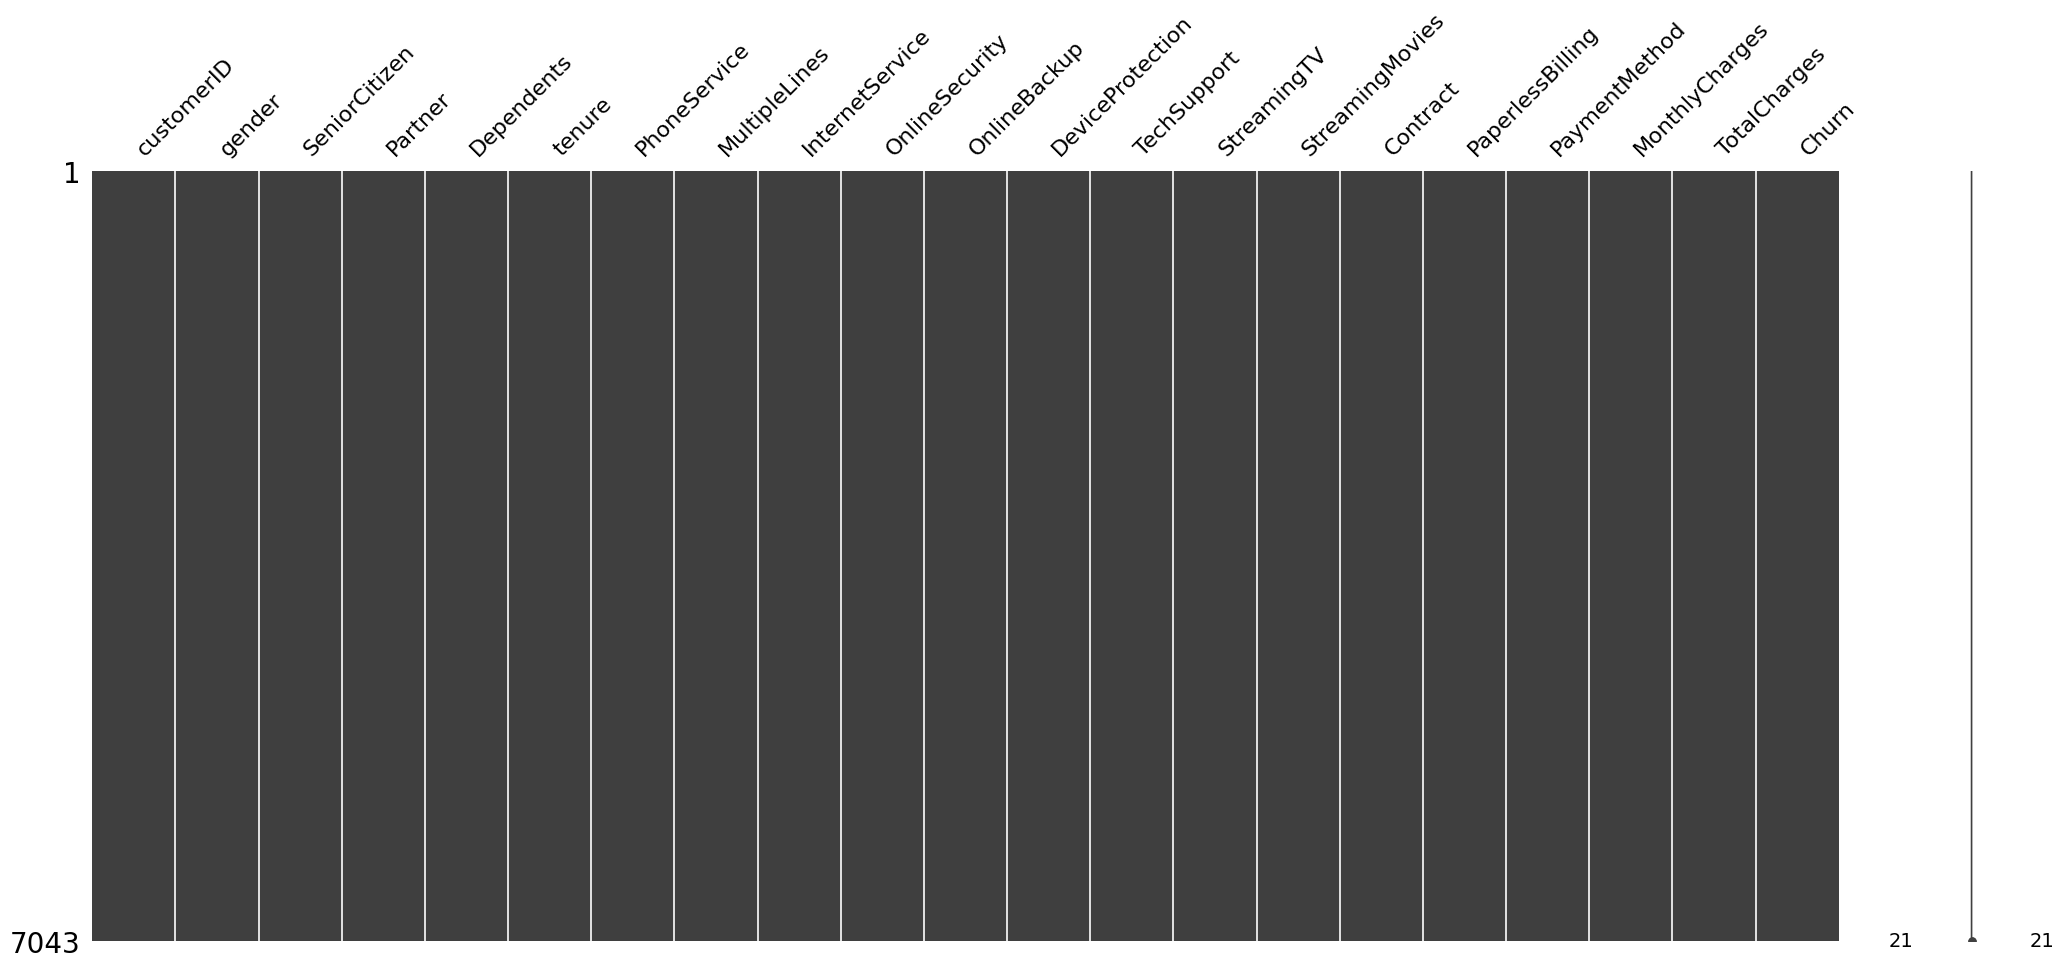

In [60]:
# visualize missing valuers

import missingno as msno
msno.matrix(df)

In [61]:
# drop the unnecessary columns 

df=df.drop(['customerID'],axis=1)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
# see the details of missing values

df[df['TotalCharges'] == ' ']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [63]:
# see the missing values 

df['TotalCharges']=pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### there are 11 records with missing total charges


In [64]:
# filling the missing values in totalcharges with mean

df.fillna(df['TotalCharges'].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [65]:
# check the tenure has 0

df[df['tenure']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [66]:
# droping the tensure has 0 
df.drop(labels=df[df['tenure']==0].index, axis=0,inplace=True)


In [67]:
# cheking the unique values
for i in df:
    print(i,': ',df[i].unique())

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :  [29.85 56.95 53.85 

In [68]:
# Checking the Statistical analysis

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [69]:
# to convering categorical to numerical

df.SeniorCitizen=df.SeniorCitizen.map({0:'No',1:'Yes'})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
# describing the internetservice

df.InternetService.describe(include=['object','bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

# EDA ( VISUALIZATION OF DATA)

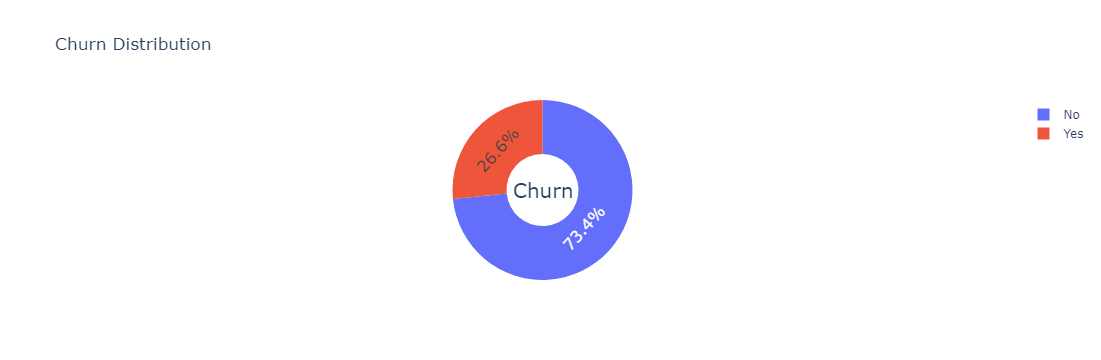

In [71]:
# Churn Distribution

type=['No','Yes']

fig=make_subplots(rows=1,cols=1)

fig.add_trace(go.Pie(labels=type, values=df['Churn'].value_counts(),name='Churn'))


# use 'hole' to create a donult like pie chart

fig.update_traces(hole=0.4, hoverinfo='label+percent+name',textfont_size=16)

fig.update_layout(
    title_text='Churn Distribution',
    # add annotation in the center of the donut pies
    annotations=[dict(text='Churn',x=0.5,y=0.5,font_size=20,showarrow=False)]
)
fig.show()

In [72]:
# checking the churn (No) count according to gender 

df.Churn[df.Churn=='No'].groupby(by=df.gender).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [73]:
# checking the churn(Yes) count according to gender

df.Churn[df.Churn=='Yes'].groupby(by=df.gender).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

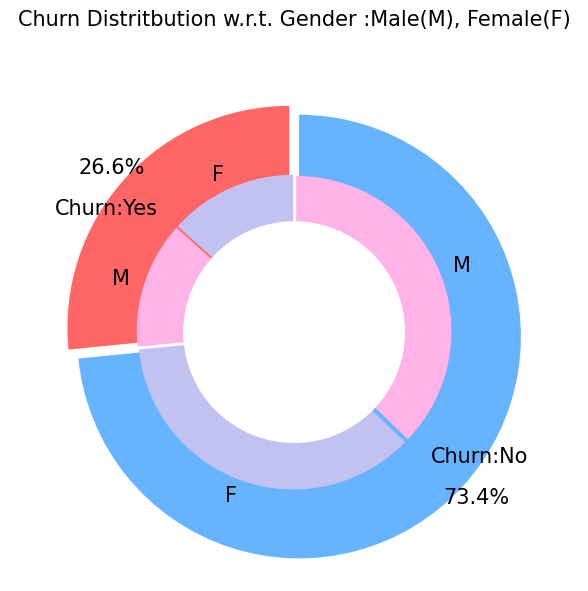

In [74]:
# Churn Distributiong w.r.t Gender

plt.figure(figsize=(6,6))
labels=['Churn:Yes','Churn:No']
values=[1869,5163]
labels_gender=['F','M','F','M']
sizes_gender=[939,930,2544,2619]
colors=['#ff6666','#66b3ff']
colors_gender=['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode=(0.3,0.3)
explode_gender=(0.1,0.1,0.1,0.1)
textprops={'fontsize':15}

# plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08,labeldistance=0.8,colors=colors,startangle=90,explode=explode,frame=True,radius=10,textprops=textprops,counterclock=True,)
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,explode=explode_gender,startangle=90,radius=7,textprops=textprops,counterclock=True,)

# draw a cirlce

centre_circle=plt.Circle((0,0),5,color='black',fc='white',linewidth=0)
fig=plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distritbution w.r.t. Gender :Male(M), Female(F)',fontsize=15,y=1.1)


# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

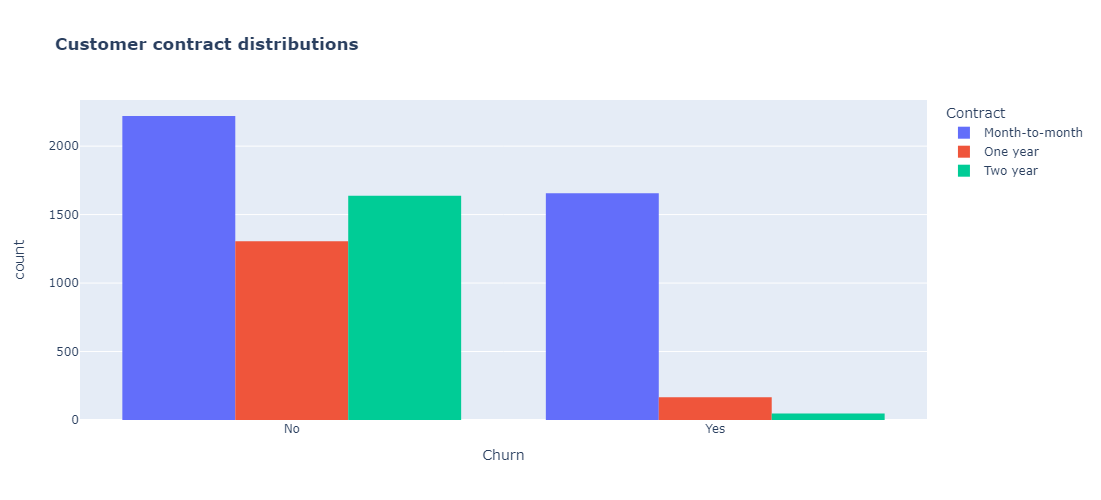

In [75]:
# customer countract distribution

fig=px.histogram(df,x='Churn',color='Contract',barmode='group',title='<b>Customer contract distributions<b>')
fig.update_layout(width=700,height=500,bargap=0.2)
fig.show()

#### CUSTOMER WITH MONTLY CONTRACCT ARE MORE LIKELY TO CHURN

In [76]:
# labels=df['PaymentMethod'].unique()
# values=df['PaymentMethod'].value_counts()

# fig=go.Figure(df=[go.Pie(labels=labels,values=values,hole=0.3)])
# fig.update_layout(title_text='<b>Payment Method Distributions<b>')
# fig.show()

# fig=px.histogram(df,x='Churn',color='PaymentMethod',title='<b>Customer Payment Method w.r.t. Churn<b>')
# fig.update_layout(width=700,height=500,bargap=0.1)
# fig.show()

In [77]:
# find out the Internetservice value count with gender(male)

df[df['gender']=='Male'][['InternetService','Churn']].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
dtype: int64

In [78]:
# find out the internetservice value count with gender(female)

df[df['gender']=='Female'][['InternetService','Churn']].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
dtype: int64

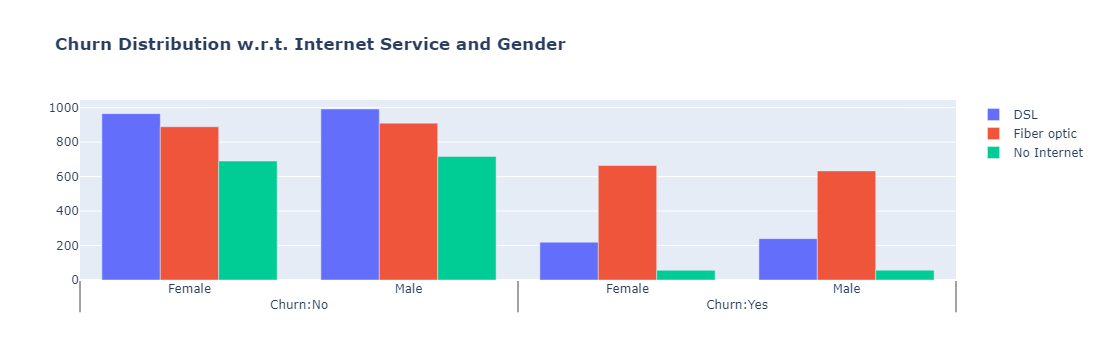

In [79]:
# Internet Service w. r. t. Gender

fig=go.Figure()

fig.add_trace(go.Bar(
    x=[['Churn:No','Churn:No','Churn:Yes','Churn:Yes'],
        ['Female','Male','Female','Male']],
    y=[965,992,219,240],
    name='DSL',
))

fig.add_trace(go.Bar(
    x=[['Churn:No','Churn:No','Churn:Yes','Churn:Yes'],
      ['Female','Male','Female','Male']],
    y=[889,910,664,633],
    name='Fiber optic',
))

fig.add_trace(go.Bar(
    x=[['Churn:No','Churn:No','Churn:Yes','Churn:Yes'],
      ['Female','Male','Female','Male']],
    y=[690,717,56,57],
    name='No Internet'
))


fig.update_layout(title_text='<b>Churn Distribution w.r.t. Internet Service and Gender<b>')
fig.show()

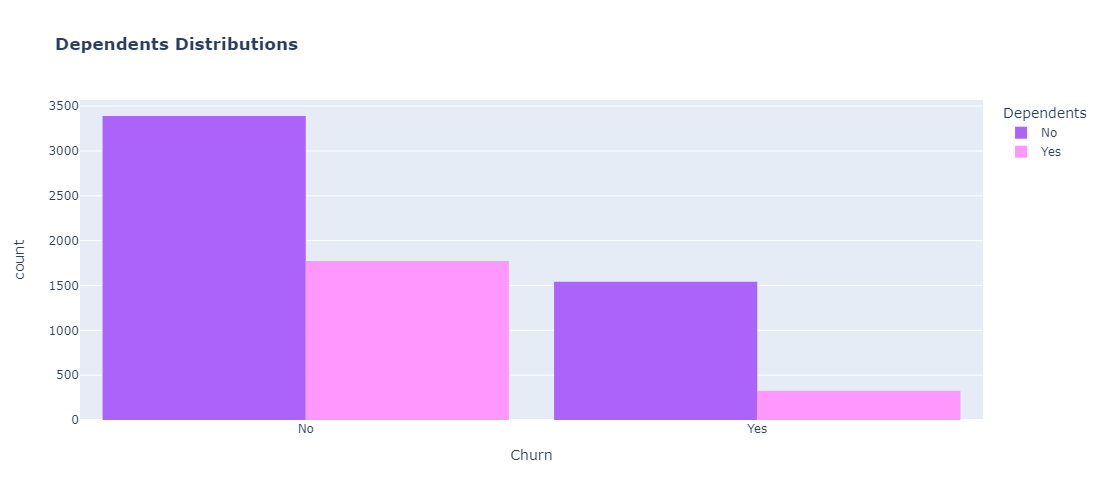

In [80]:
#  Churn Distribution w. r. t. Dependents 

color_map={'Yes':'#FF97FF','No':'#AB63FA'}

fig=px.histogram(df,x='Churn',color='Dependents',barmode='group',title='<b>Dependents Distributions<b>',color_discrete_map=color_map)

fig.update_layout(width=700,height=500,bargap=0.1)

fig.show()

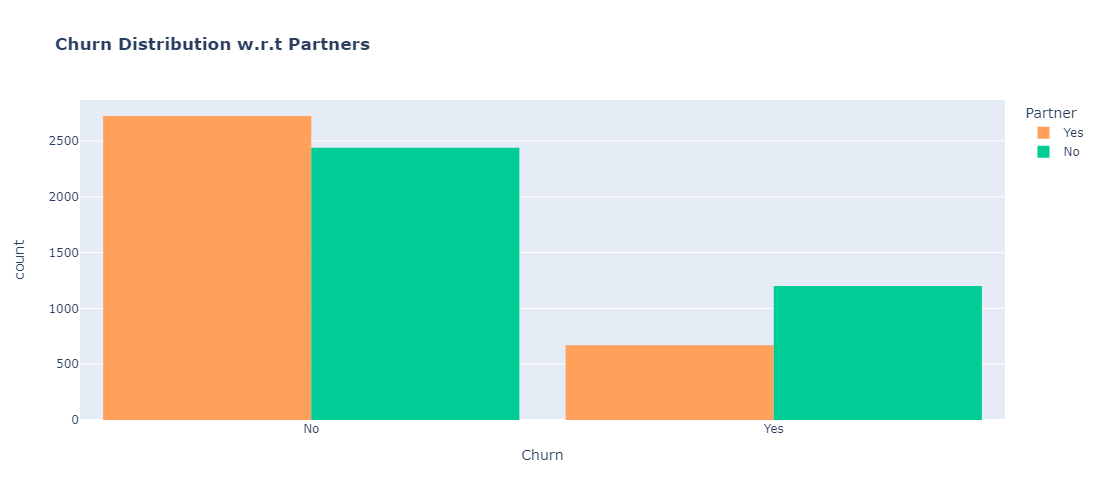

In [81]:
# Churn Distribution w.r. t. Partners

color_map={'Yes':'#FFA15A','No':'#00CC96'}

fig=px.histogram(df,x='Churn',color='Partner',barmode='group',title='<b>Churn Distribution w.r.t Partners<b>',color_discrete_map=color_map)

fig.update_layout(width=700,height=500,bargap=0.1)

fig.show()

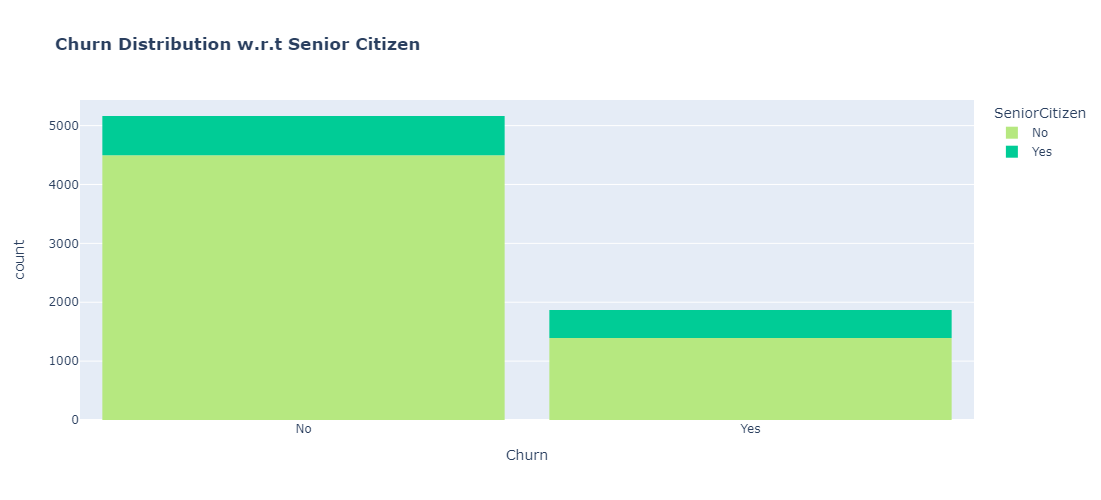

In [82]:
color_map={'Yes':'#00CC96','No':'#B6E880'}

fig=px.histogram(df,x='Churn',color='SeniorCitizen',title='<b>Churn Distribution w.r.t Senior Citizen',color_discrete_map=color_map)

fig.update_layout(width=700,height=500,bargap=0.1)

fig.show()

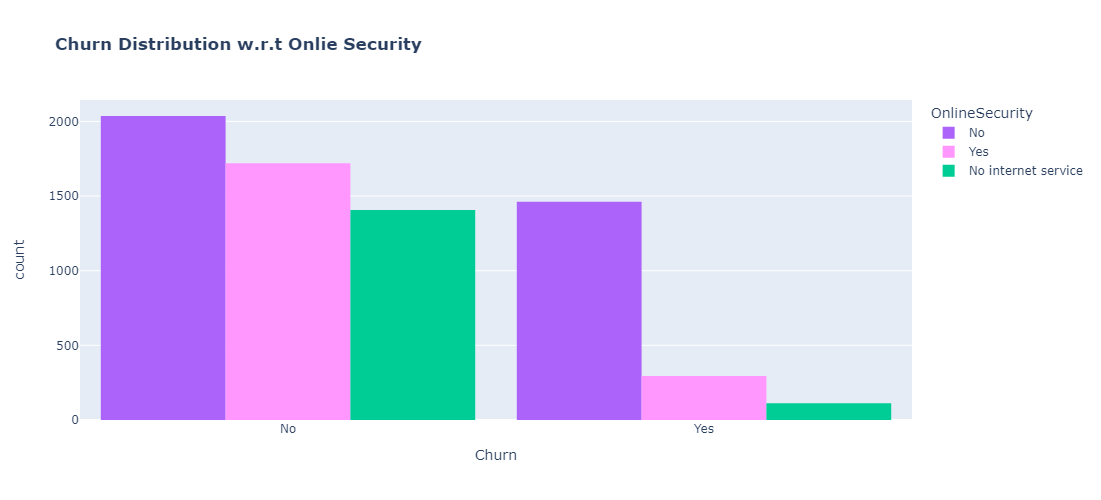

In [83]:
# Churn Distributions w.r.t. Online Security

color_map={'Yes':'#FF97FF','No':'#AB63FA'}

fig=px.histogram(df,x='Churn',color='OnlineSecurity',barmode='group',title='<b>Churn Distribution w.r.t Onlie Security',color_discrete_map=color_map)

fig.update_layout(width=700,height=500,bargap=0.1)

fig.show()

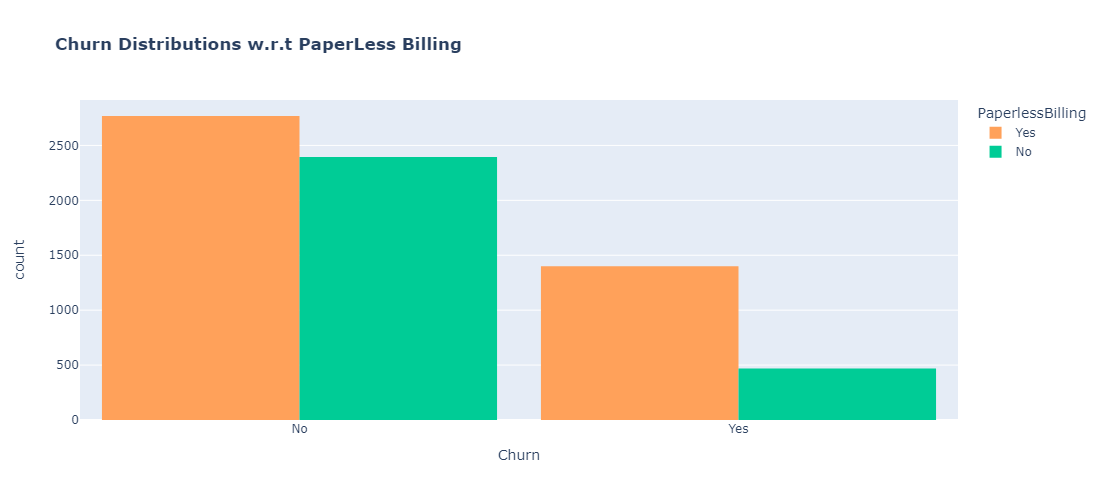

In [84]:
# Churn Distribution w.r.t. PaperLesss Billing

color_map={'Yes':'#FFA15A','No':'#00CC96'}

fig=px.histogram(df,x='Churn',color='PaperlessBilling',barmode='group',title='<b>Churn Distributions w.r.t PaperLess Billing',color_discrete_map=color_map)

fig.update_layout(width=700,height=500,bargap=0.1)

fig.show()

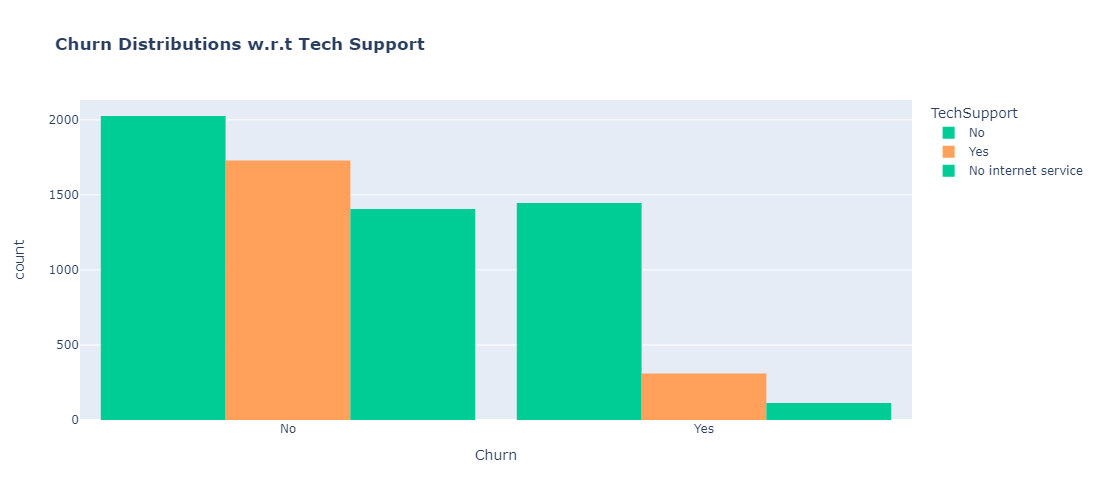

In [85]:
color_map={'Yes':'#FFA15A','No':'#00CC96'}

fig=px.histogram(df,x='Churn',color='TechSupport',barmode='group',title='<b>Churn Distributions w.r.t Tech Support',color_discrete_map=color_map)

fig.update_layout(width=700,height=500,bargap=0.1)

fig.show()

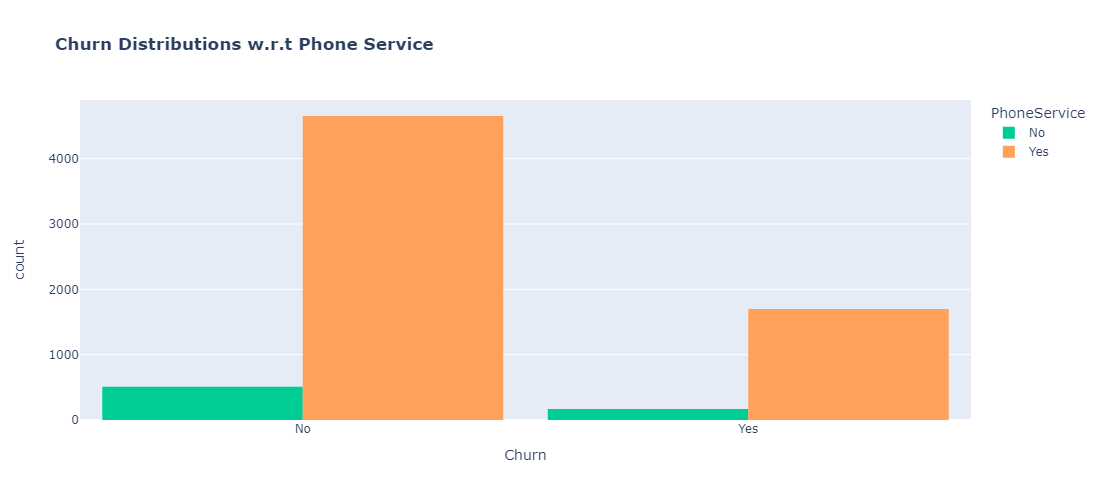

In [86]:
# Churn Distribution w.r.t to Phone Service

color_map={'Yes':'#FFA15A','No':'#00CC96'}

fig=px.histogram(df,x='Churn',color='PhoneService',barmode='group',title='<b>Churn Distributions w.r.t Phone Service',color_discrete_map=color_map)

fig.update_layout(width=700,height=500,bargap=0.1)

fig.show()

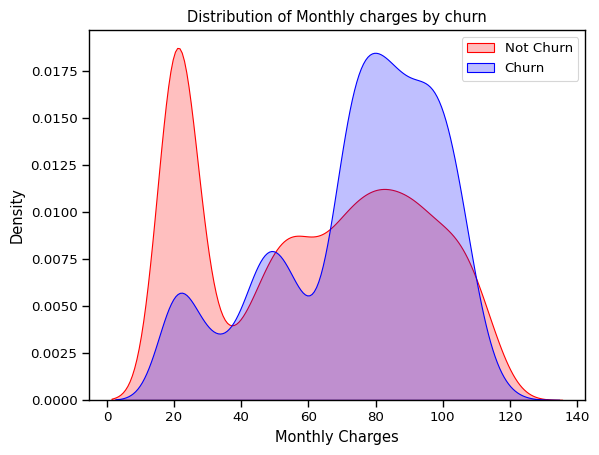

In [87]:
# Churn Distribution with Monthly by kdeplot

sns.set_context('paper',font_scale=1.1)

ax=sns.kdeplot(df.MonthlyCharges[(df['Churn']=='No')],color='Red',shade=True);
ax=sns.kdeplot(df.MonthlyCharges[(df['Churn']=='Yes')],color='Blue',shade=True);
ax.legend(['Not Churn','Churn'],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly charges by churn');

#### CUSTOMERS WITH HIGHER MONTLY CHARGES ARE MORE LIKELY TO CHURN


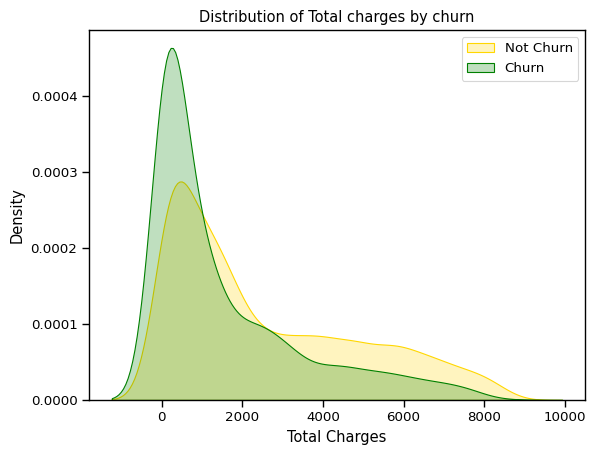

In [88]:
# Churn Distribution w.r.t. to Total Charges by Kdeplot

sns.set_context('paper',font_scale=1.1)

ax=sns.kdeplot(df.TotalCharges[(df['Churn']=='No')],color='Gold',shade=True);
ax=sns.kdeplot(df.TotalCharges[(df['Churn']=='Yes')],color='Green',shade=True);
ax.legend(['Not Churn','Churn'],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total charges by churn');

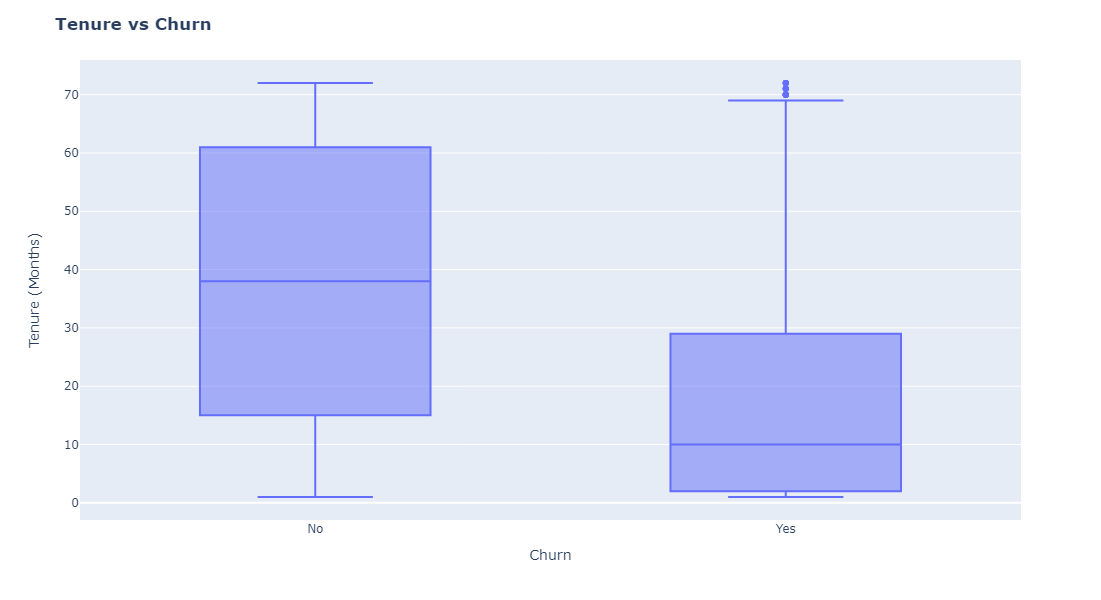

In [89]:
#Churn distrubtion w. r. t. Tenure

fig=px.box(df,x='Churn',y='tenure')

# update y axis properites

fig.update_yaxes(title_text='Tenure (Months)',row=1,col=1)

# update x axis properties

fig.update_xaxes(title_text='Churn',row=1,col=1)

# update size and tile 

fig.update_layout(autosize=True,width=750,height=600,
                 title_font=dict(size=25,family='Courier'),
                 title='<b>Tenure vs Churn<b>')

fig.show()

#### NEW CUSTOMERS ARE MORE LIKELY TO CHURN

In [90]:
# Create a label Encoder object

le=LabelEncoder()

#label encoding will be used for columns with 2 or less uniuqe values

le_count=0

for col in df.columns[1:]:
    if df[col].dtype =='object':
        if len(list(df[col].unique()))<=2:
            le.fit(df[col])
            df[col]=le.transform(df[col])
            le_count +=1


print('{} columns were label  encoded.'.format(le_count))

6 columns were label  encoded.


Text(0.5, 1.0, 'Correlations with Churn Rate \n')

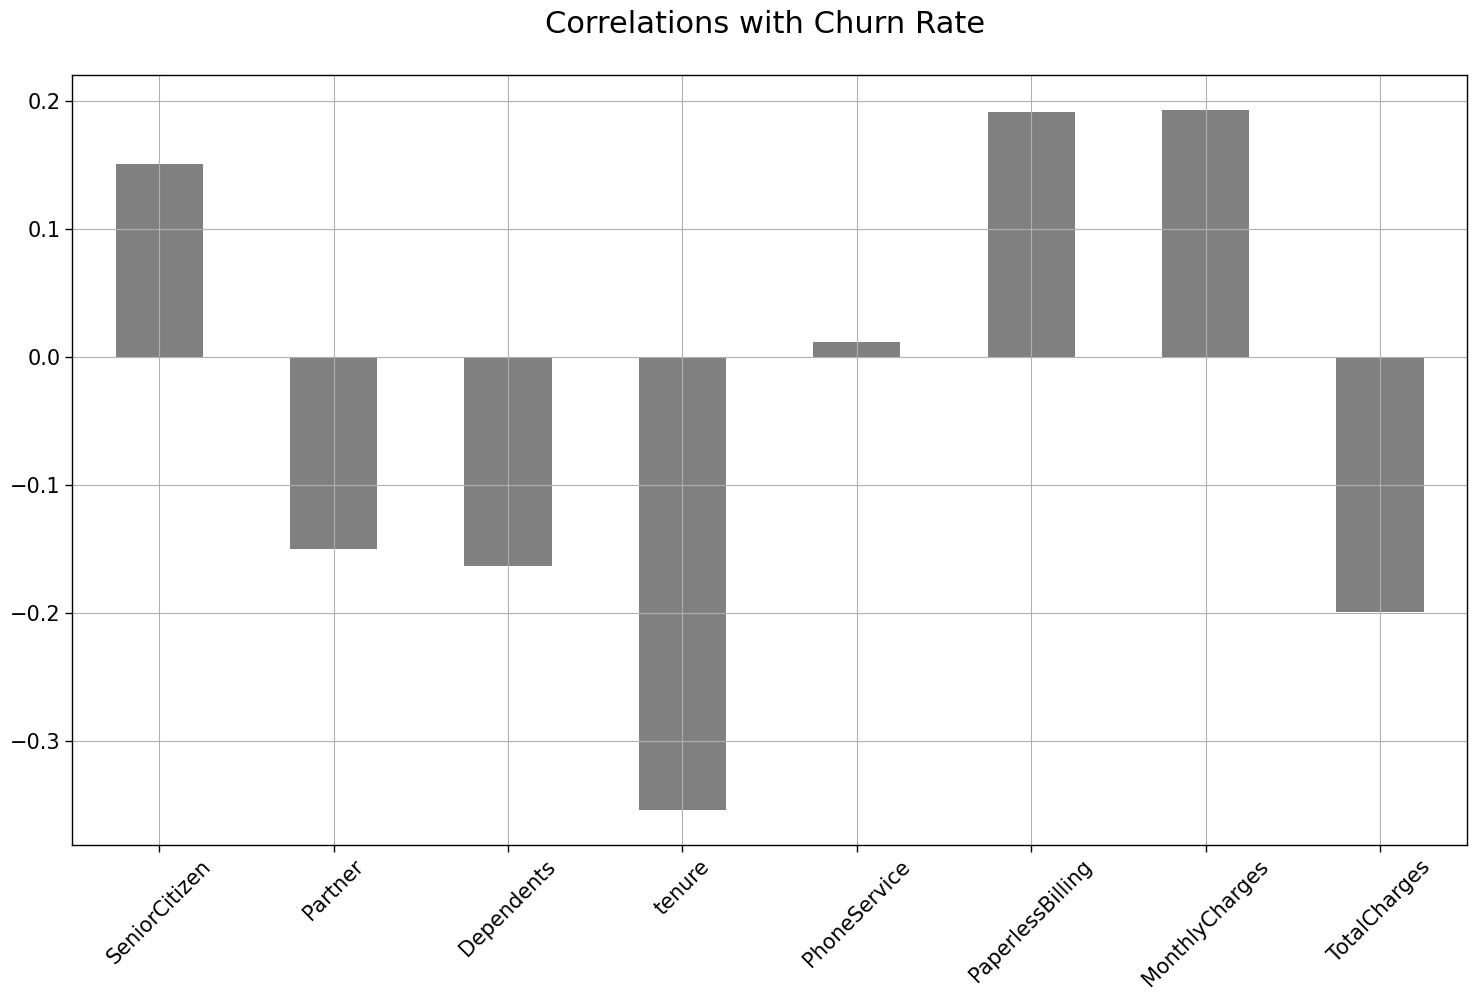

In [92]:
# Churn Distribution with Correlation rate

df2=df[['SeniorCitizen','Partner','Dependents','tenure','PhoneService','PaperlessBilling',
       'MonthlyCharges','TotalCharges']]

correlations=df2.corrwith(df.Churn)

correlations=correlations[correlations!=1]

positive_correlations=correlations[correlations >0].sort_values(ascending=False)

negative_correlations=correlations[correlations <0].sort_values(ascending=False)


correlations.plot.bar(
    figsize=(18,10),
    fontsize=15,
    color='grey',
    rot=45,grid=True
)

plt.title('Correlations with Churn Rate \n',
         horizontalalignment='center',fontstyle='normal',
         fontsize='22',fontfamily='sans-serif')





#### here Parter , Dependents , Tenure, TotalCharges has a negative Correlations

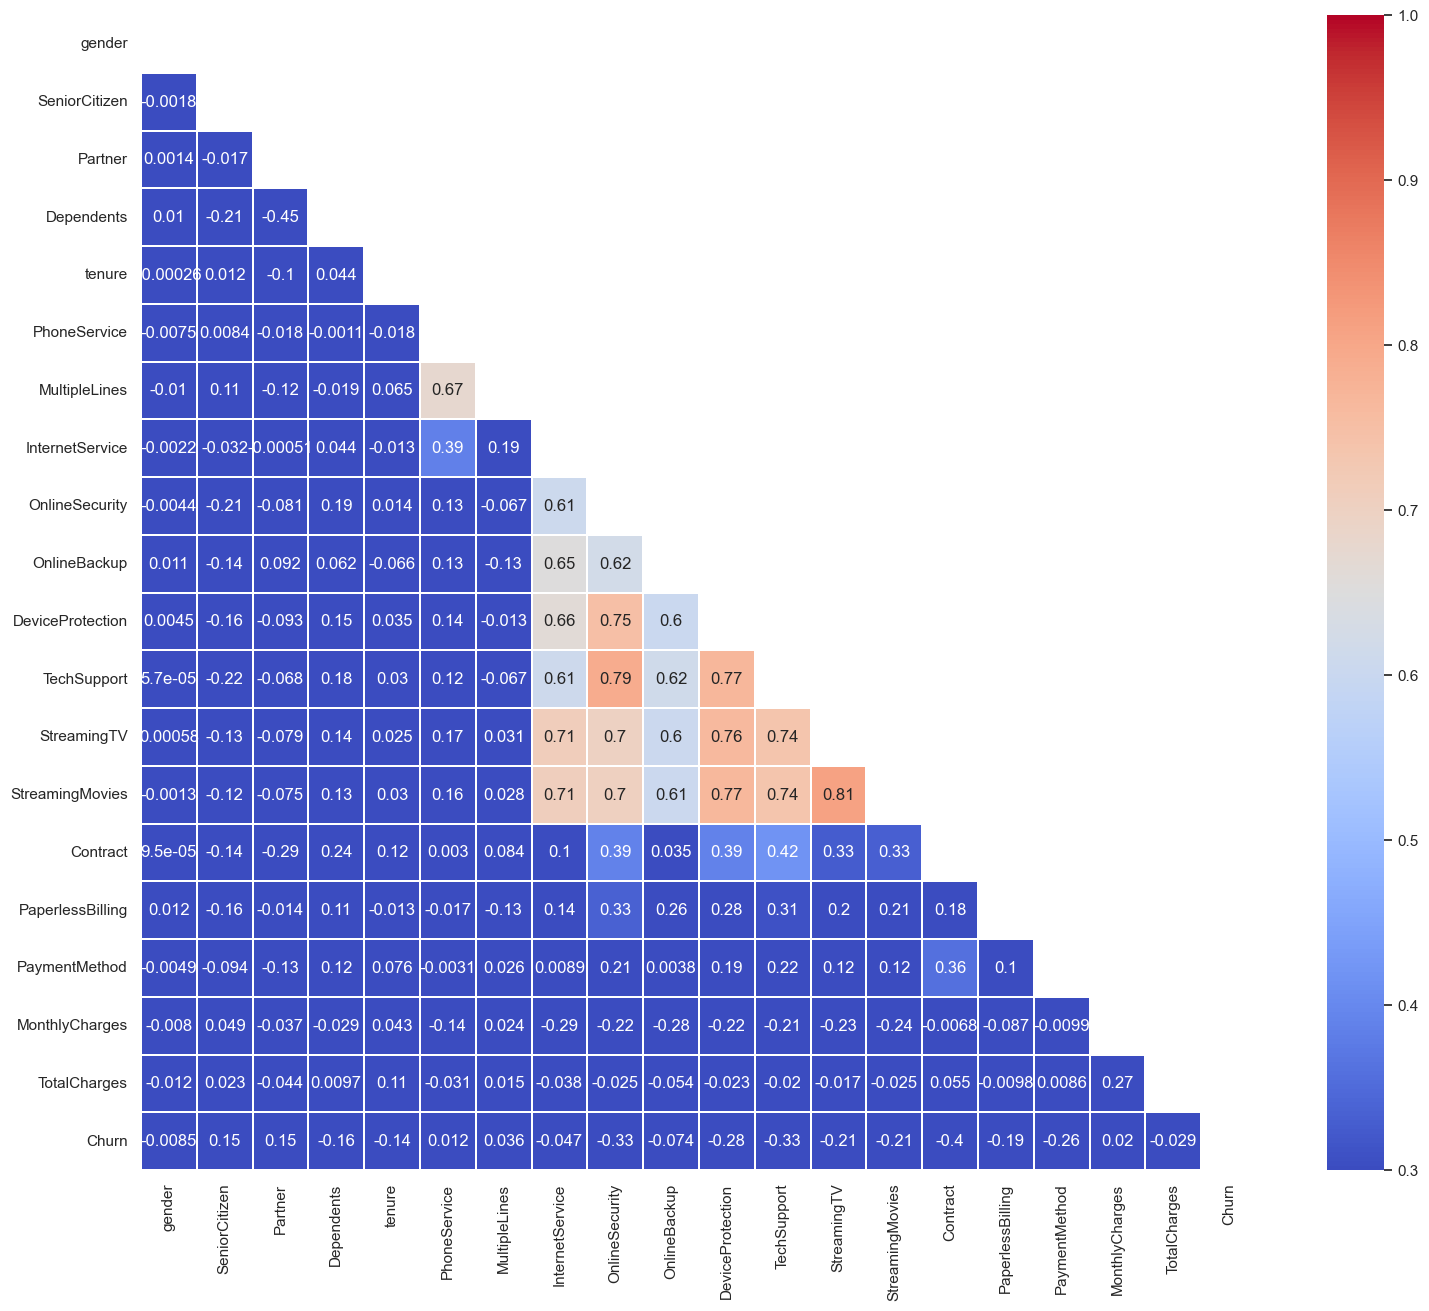

In [44]:
# SET AND COMPUTE THE CORRELATION MATRIX

sns.set(style='white')
plt.figure(figsize=(18,15))

corr=df.apply(lambda x:pd.factorize(x)[0]).corr()


mask=np.triu(np.ones_like(corr,dtype=bool))

ax=sns.heatmap(corr,mask=mask,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,
              cmap='coolwarm',linewidths=0.2,vmin=0.3,vmax=1)



<AxesSubplot: >

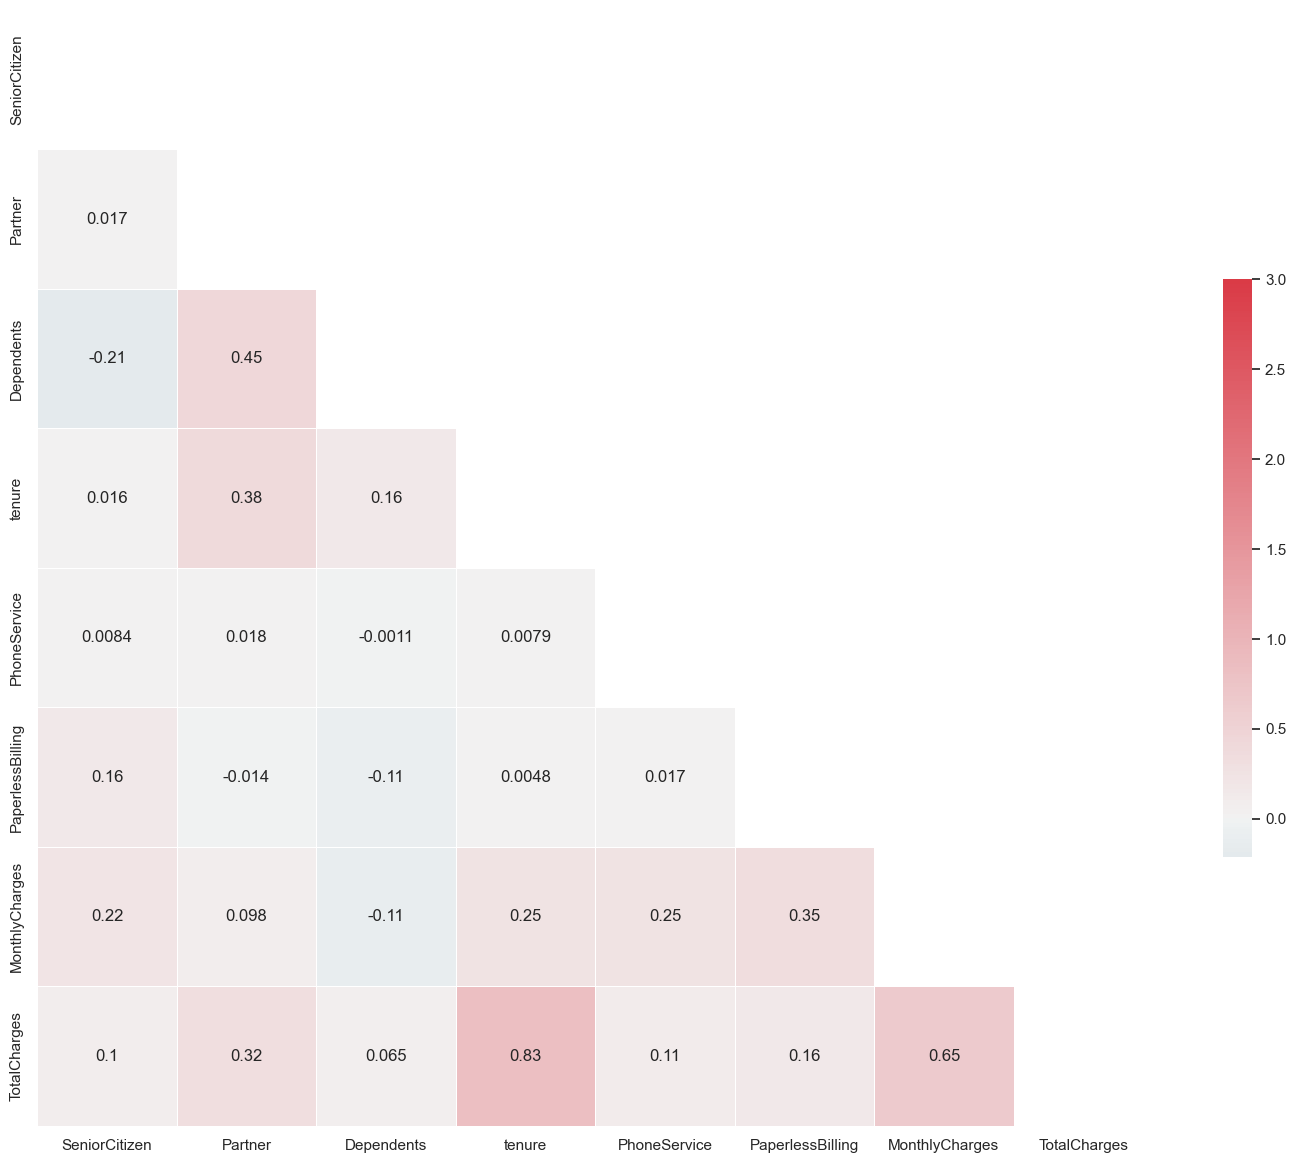

In [95]:
# set and compute the correlations matrix

sns.set(style='white')
corr=df2.corr()

# generate a mask for the upper triagle

mask=np.zeros_like(corr,dtype=np.bool_)
mask[np.triu_indices_from(mask)]=True


# set up the matplotlib figure and a diversing colormap

f,ax=plt.subplots(figsize=(18,15))
cmap=sns.diverging_palette(220,10,as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr,mask=mask,cmap=cmap, vmax=3,center=0,square=True,annot=True,
           linewidths=0.5,cbar_kws={'shrink':0.5})


In [47]:
# MULTICOLILINEARITY CHECK USING VIF

# TODO:

## from statsmodels.stats.outliers_influence import variance_inflation_factor_data=pd.read_csv('data.csv')X=
## data[['gender','SeniorCitize','Partner','Dependents','tenure','PhoneService',
##  'PaperlessBilling','MonthlyCharges','TotalCharges']]

## vif_data=pd.DataFrame()vif_data['feature']=X.Columns


# Calculating VIF for each feature

## vif_data['VIF']=[variance_inflation_factor(X.value,i) for i in range(len(X.clumns))]

#print(vif_head())

In [96]:
# encoding 
def encode_df(dataframe):
    if dataframe.dtype == 'object':
        dataframe=LabelEncoder().fit_transform(dataframe)
    return dataframe


df=df.apply(lambda x : encode_df(x))

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [97]:
# spliting the data

x=df.drop(columns='Churn')
y=df['Churn'].values

In [98]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [99]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4,stratify=y)



In [102]:
def distplot(feature,frame,color='r'):
    plt.figure(figsize=(8,3))
    plt.title('Distribution for {}'.format(feature))
    ax=sns.distplot(frame[feature],color=color)

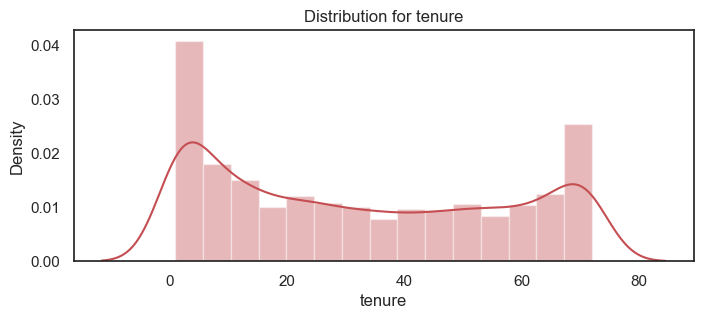

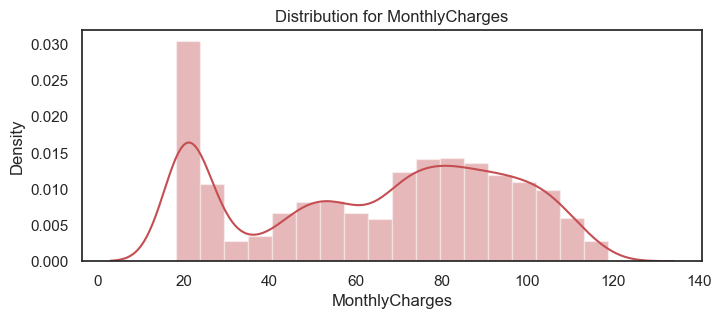

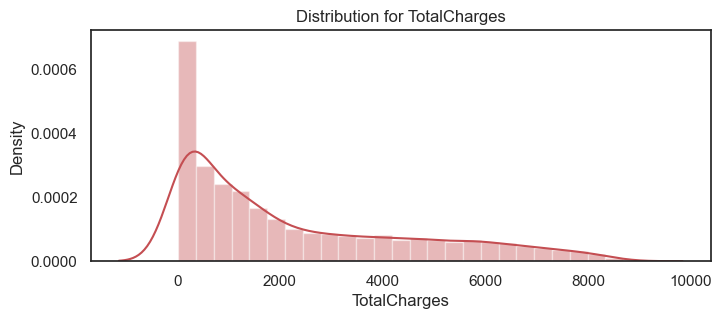

In [103]:
# Distribution of feature

col=['tenure','MonthlyCharges','TotalCharges']

for features in col:distplot(features,df)

In [55]:
# the features need standard scalling as all of them are distributed over different range valuee

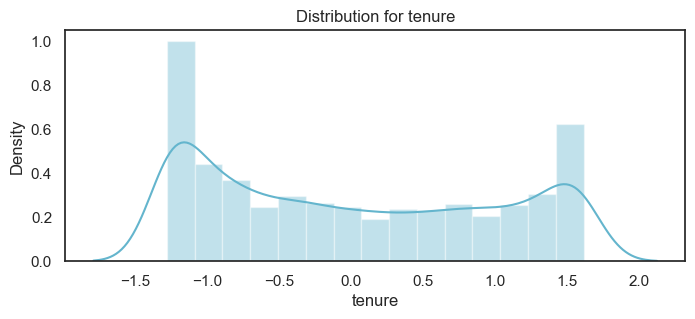

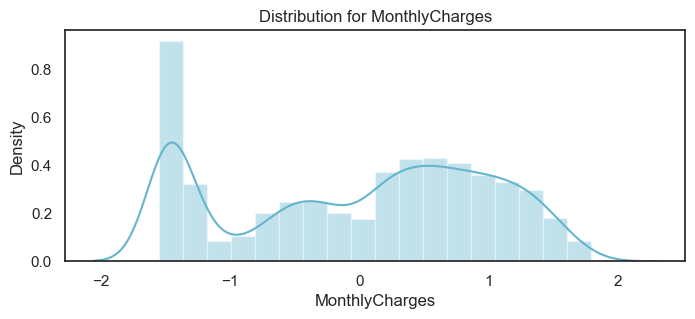

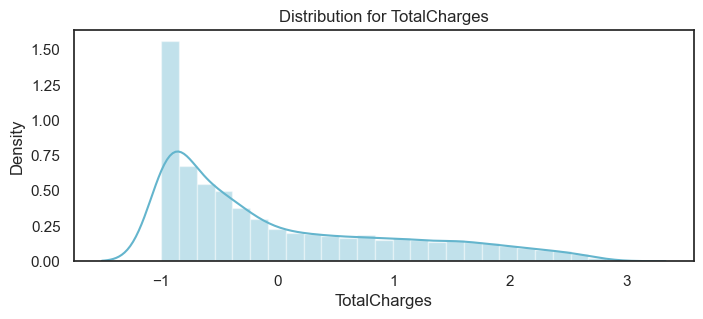

In [104]:
# scalling the data

df_std=pd.DataFrame(StandardScaler().fit_transform(df[col]).astype('float64'),columns=col)

for feat in col:distplot(feat,df_std,color='c')

In [105]:
# divide the columns into 3 categories, one after standardiasation, one after label encoding a, and one after one hot encoidnga

cat_cols_ohe=['PaymentMethod','Contract','InternetService']  # those that need one -hot encoding
cat_cols_le=list(set(x_train.columns)-set(col)-set(cat_cols_ohe))  # thsose that nedd label encoding

print(cat_cols_le)

['Dependents', 'SeniorCitizen', 'PhoneService', 'PaperlessBilling', 'StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'DeviceProtection', 'OnlineBackup', 'gender', 'MultipleLines', 'TechSupport', 'Partner']


# MODEL BUILDING

In [107]:
# scalling the data

scaler=StandardScaler()
x_train[col]=StandardScaler().fit_transform(x_train[col])
x_test[col]=StandardScaler().fit_transform(x_test[col])


In [108]:
 # creating a models

models=[]

models.append(('Logistic Regression',LogisticRegression(solver='liblinear',random_state=0,class_weight='balanced')))
models.append(('SVC',SVC(kernel='linear',random_state=0)))
models.append(('Kernel SVM0',SVC(kernel='rbf',random_state=0)))
models.append(('KNN',KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)))
models.append(('Gaussian NB',GaussianNB()))
models.append(('Decision Tree Classifer',DecisionTreeClassifier(criterion='entropy',random_state=0)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)))
models.append(('AdaBoost',AdaBoostClassifier()))
models.append(('Gradient Boost Classifier',GradientBoostingClassifier()))
models.append(('Voting Classifier',VotingClassifier(estimators=[('gbc',GradientBoostingClassifier()),('abc',AdaBoostClassifier())],voting='soft')))


In [109]:
# some other libraries also importing
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier

In [110]:
# EVALUATING THE MODELS RESULTS

acc_results=[]
auc_results=[]
names=[]

result_col=['Algorithm','ROC AUC Mean','ROC AUC STD','Accuracy Mean','Accuracy STD']
model_results=pd.DataFrame(columns=result_col)


i=0

# k-fold cross validation

for name,model in models:
    names.append(name)
    kfold=model_selection.KFold(n_splits=10)

    cv_acc_results=model_selection.cross_val_score(model,x_train,y_train,
                                cv=kfold,scoring='accuracy')
    cv_auc_results=model_selection.cross_val_score(model,x_train,y_train,
                                cv=kfold,scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)

    model_results.loc[i]=[name,
                         round(cv_auc_results.mean()*100,2),
                         round(cv_auc_results.std()*100,2),
                         round(cv_acc_results.mean()*100,2),
                         round(cv_acc_results.std()*100,2)]
    i+=1

model_results.sort_values(by=['ROC AUC Mean'],ascending=False)




,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
8,Gradient Boost Classifier,84.73,1.45,79.78,1.99
9,Voting Classifier,84.72,1.45,79.72,1.94
7,AdaBoost,84.55,1.25,80.09,1.77
0,Logistic Regression,84.39,1.47,74.38,1.94
1,SVC,82.99,2.07,79.11,2.01
6,Random Forest,82.75,2.01,78.67,1.98
4,Gaussian NB,82.32,1.28,75.38,1.23
2,Kernel SVM0,79.65,2.12,79.26,1.67
5,Decision Tree Classifer,66.67,1.07,73.73,1.12
3,KNN,NaN,NaN,NaN,NaN


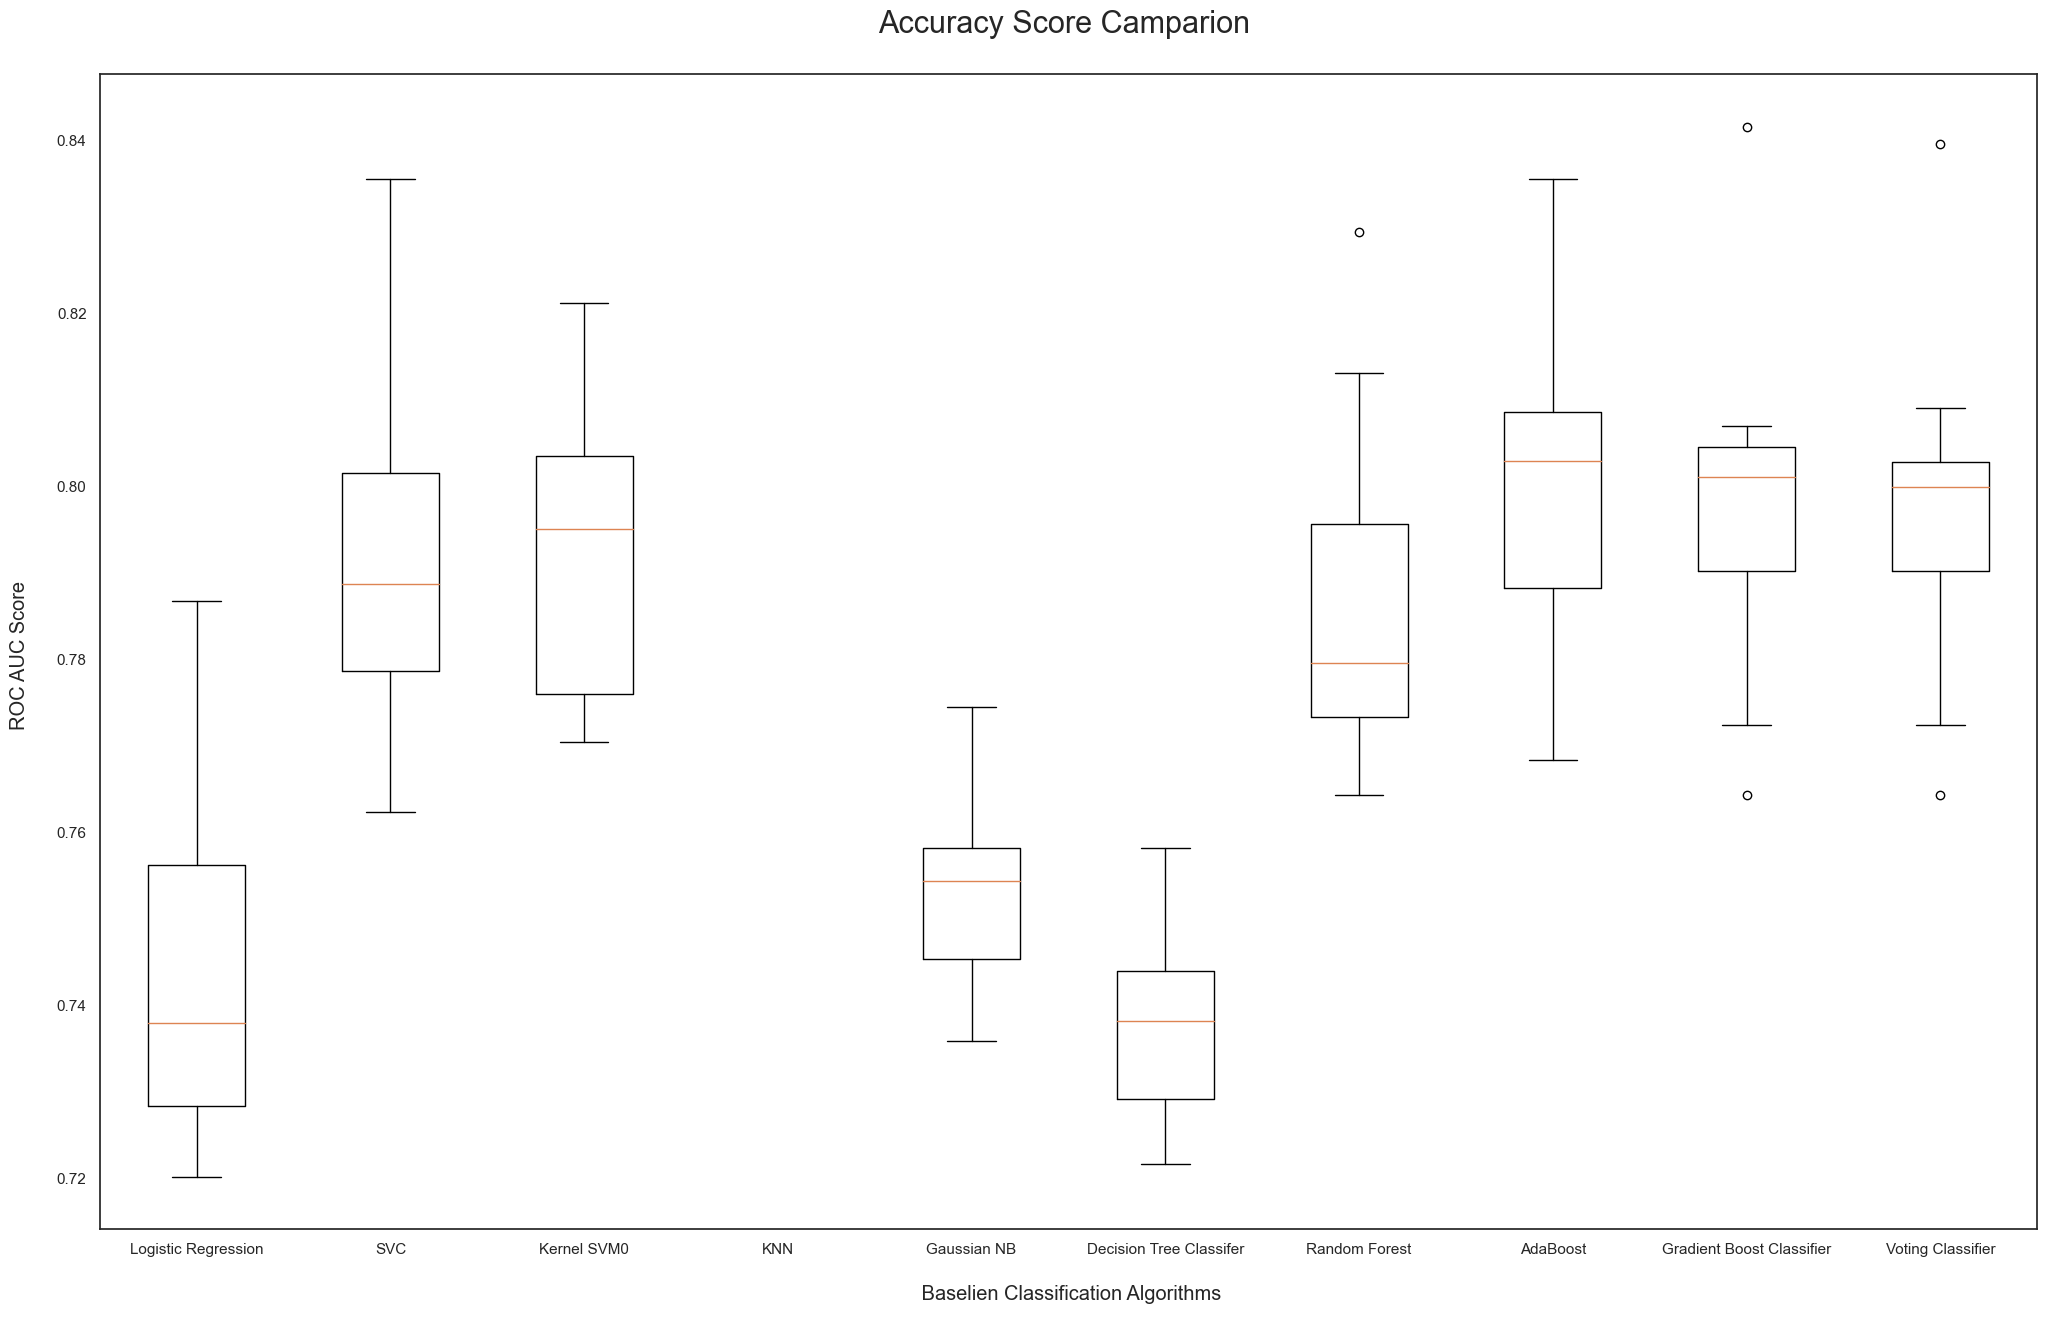

In [112]:
# Accuracy Score Camparion

fig=plt.figure(figsize=(25,15))
ax=fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score \n',
horizontalalignment='center',fontstyle='normal',fontsize='large',fontfamily='sans-serif')

plt.xlabel('\n Baselien Classification Algorithms\n',
horizontalalignment='center',fontstyle='normal',fontsize='large',fontfamily='sans-serif')

plt.title('Accuracy Score Camparion \n',
horizontalalignment='center',fontstyle='normal',fontsize='22',fontfamily='sans-serif')

plt.xticks(rotation=0,horizontalalignment='center')
plt.yticks(rotation=0,horizontalalignment='right')
plt.show()

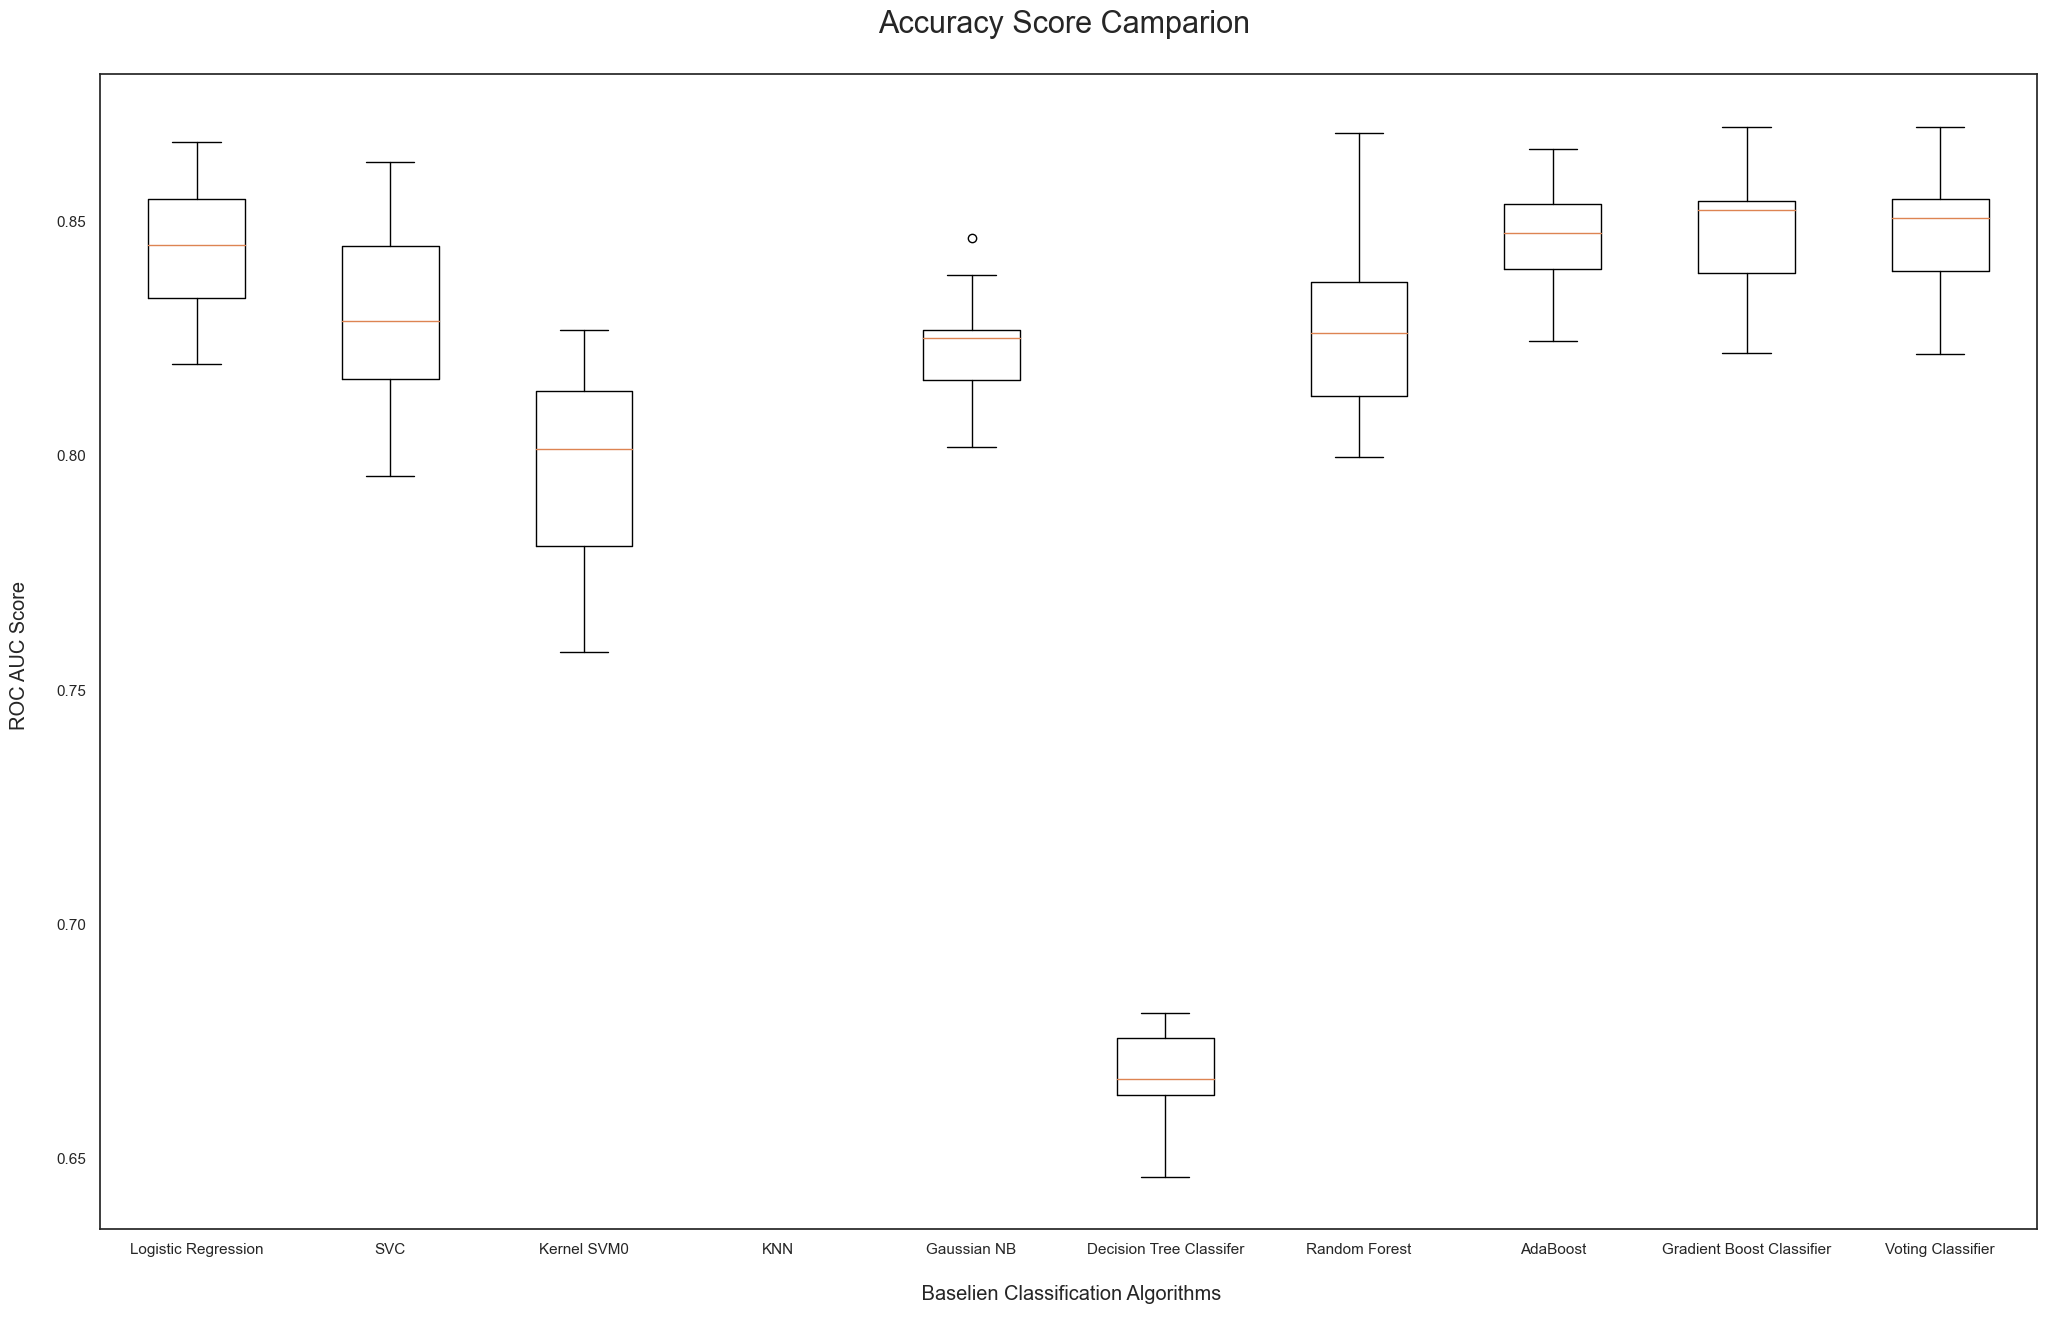

In [113]:
# Accuracy Score Camparions

fig=plt.figure(figsize=(25,15))
ax=fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score \n',
horizontalalignment='center',fontstyle='normal',fontsize='large',fontfamily='sans-serif')

plt.xlabel('\n Baselien Classification Algorithms\n',
horizontalalignment='center',fontstyle='normal',fontsize='large',fontfamily='sans-serif')

plt.title('Accuracy Score Camparion \n',
horizontalalignment='center',fontstyle='normal',fontsize='22',fontfamily='sans-serif')

plt.xticks(rotation=0,horizontalalignment='center')
plt.yticks(rotation=0,horizontalalignment='right')
plt.show()

In [114]:
# score_array=[]

# for each in range(1,25):
#     knn_loop=KNeighborsClassifier(n_neighbors=each)
#     knn_loop.fit(x_train,y_train)
#     score_array.append(knn_loop.score(x_test,y_test))
# score_array()

In [115]:
score_array=[]

for each in range(1,100):
    rf_loop=RandomForestClassifier(n_estimators=each,random_state=1)
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))


In [116]:
score_array

[0.7109004739336493,
 0.7511848341232228,
 0.7374407582938388,
 0.7578199052132701,
 0.7568720379146919,
 0.7720379146919432,
 0.7592417061611374,
 0.7682464454976303,
 0.7658767772511849,
 0.7682464454976303,
 0.7668246445497631,
 0.7720379146919432,
 0.771563981042654,
 0.7758293838862559,
 0.7744075829383886,
 0.7781990521327015,
 0.7758293838862559,
 0.781042654028436,
 0.7777251184834123,
 0.776303317535545,
 0.7734597156398104,
 0.7805687203791469,
 0.7838862559241706,
 0.7853080568720379,
 0.7829383886255924,
 0.7890995260663507,
 0.7848341232227488,
 0.7848341232227488,
 0.7819905213270142,
 0.7853080568720379,
 0.7800947867298578,
 0.7834123222748816,
 0.781042654028436,
 0.781042654028436,
 0.7800947867298578,
 0.7800947867298578,
 0.7834123222748816,
 0.7805687203791469,
 0.781042654028436,
 0.7824644549763033,
 0.7838862559241706,
 0.7791469194312797,
 0.7815165876777251,
 0.7796208530805687,
 0.7796208530805687,
 0.7819905213270142,
 0.7834123222748816,
 0.7838862559241706

### 2ND ITERATION

In [117]:
# evaluationg of results

def model_evaluation(y_test,y_pred,model_name):
    acc=accuracy_score(y_test,y_pred)
    prec=precision_score(y_test,y_pred)
    rec=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    f2=fbeta_score(y_test,y_pred,beta=2.0)


    results=pd.DataFrame([[model_name,acc,prec,rec,f1,f2]],
                        columns=['Model','Accuracy','Precision','Recall','F1 score','F2 score'])

    results=results.sort_values(['Precision','Recall','F2 score'],ascending=False)
    return results

In [118]:
# LOGISTIC REGRESSION

classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)


# SVC

classifier2=SVC(kernel='linear',random_state=0)
classifier2.fit(x_train,y_train)
y_pred2=classifier2.predict(x_test)


# KNN

# classifier3=KNeighborsClassifier(n_neighbors=22,metric='minkowski')
# classifier3.fit(x_train,y_train)
# y_pred3=classifier3.predict(x_test)


# KERNEL SVM

classifier4=SVC(kernel='rbf',random_state=0)
classifier4.fit(x_train,y_train)
y_pred4=classifier4.predict(x_test)



# NAIVE BAYES

classifier5=GaussianNB()
classifier5.fit(x_train,y_train)
y_pred5=classifier5.predict(x_test)


# DECISION TREE

classifier6=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier6.fit(x_train,y_train)
y_pred6=classifier6.predict(x_test)



# RANDOM FOREST

classifier7=RandomForestClassifier(n_estimators=72,criterion='entropy',random_state=0)
classifier7.fit(x_train,y_train)
y_pred7=classifier7.predict(x_test)


# ADABOOST 

classifier8=AdaBoostClassifier()
classifier8.fit(x_train,y_train)
y_pred8=classifier8.predict(x_test)


# GRADIENT BOOSTabs

classifier9=GradientBoostingClassifier()
classifier9.fit(x_train,y_train)
y_pred9=classifier9.predict(x_test)



# VOTING CLASSIFIER

classifier10=VotingClassifier(estimators=[
    ('gbc',GradientBoostingClassifier()),('lr',LogisticRegression()),
    ('abc',AdaBoostClassifier())],voting='soft')
classifier10.fit(x_train,y_train)
y_pred10=classifier10.predict(x_test)

In [119]:
# models 

lr=model_evaluation(y_test,y_pred,'Logistic Regression')
svm=model_evaluation(y_test,y_pred2,'SVM(Linear)')
# knn=model_evaluation(y_test,y_pred3,'K-nearest neighbours')
k_svm=model_evaluation(y_test,y_pred4,'Kenerl SVM')
nb=model_evaluation(y_test,y_pred5,'Naive Bayes')
dt=model_evaluation(y_test,y_pred6,'Decision Tree')
rf=model_evaluation(y_test,y_pred7,'Random Forest')
ab=model_evaluation(y_test,y_pred8,'Adaboost')
gb=model_evaluation(y_test,y_pred9,'Gradient Boost')
vc=model_evaluation(y_test,y_pred10,'Voting Classifier')

In [120]:
# 
eval_=lr.append(svm).append(k_svm).append(nb).append(dt).append(rf).append(ab).append(vc).append(gb).sort_values(
    ['Precision','Recall','F2 score'],ascending=False).reset_index().drop(columns='index')
eval_

,Model,Accuracy,Precision,Recall,F1 score,F2 score
0,Adaboost,0.812322,0.687927,0.538324,0.604000,0.562803
1,Voting Classifier,0.808531,0.675615,0.538324,0.599206,0.561130
2,Gradient Boost,0.804265,0.669725,0.520499,0.585757,0.544776
3,Kenerl SVM,0.793839,0.659898,0.463458,0.544503,0.492798
4,Logistic Regression,0.805687,0.658281,0.559715,0.605010,0.576994
5,Random Forest,0.796682,0.650685,0.508021,0.570571,0.531320
6,SVM(Linear),0.788626,0.628635,0.500891,0.557540,0.522111
7,Naive Bayes,0.756872,0.531088,0.730838,0.615154,0.679708
8,Decision Tree,0.732701,0.497364,0.504456,0.500885,0.503022


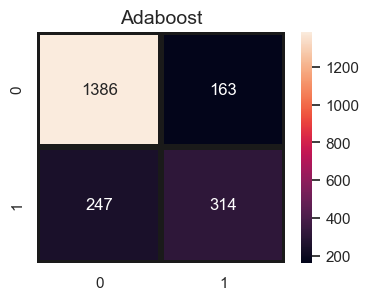

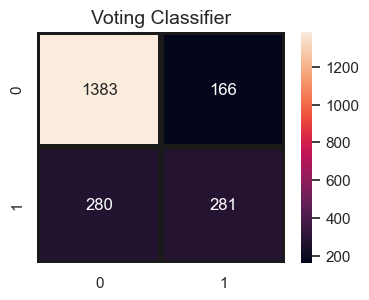

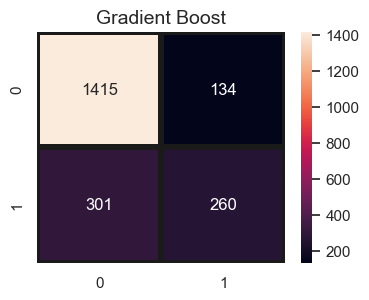

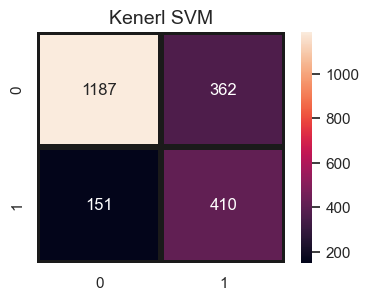

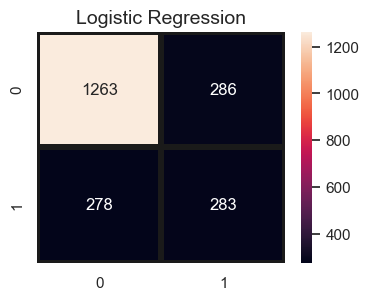

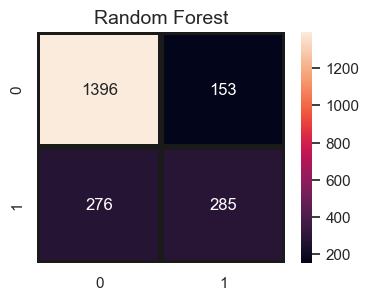

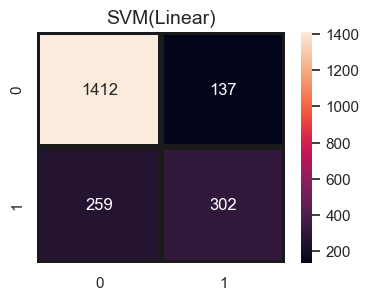

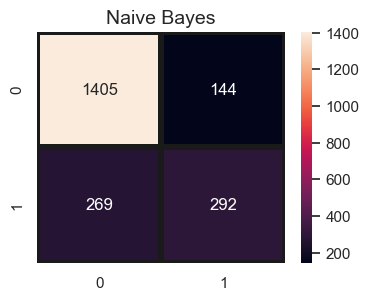

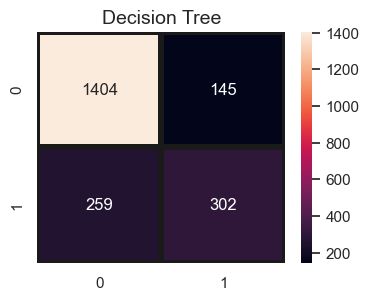

In [121]:
# prediction details

predictions=[y_pred,y_pred2,y_pred4,y_pred5,y_pred6,y_pred7,y_pred8,y_pred9,y_pred10]

for i , j in zip(predictions,eval_.Model.values):
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test,i),
                annot=True,fmt='d',linecolor='k',linewidths=3)

    plt.title(j,fontsize=14)
    plt.show()

In [76]:
# K-fold Cross -Validation
# model evaluation is most commonly done through 'K-Fold Cross-Validation' technique that 
# primaritly helps us to fix the variance. VAriance problem occurs when we get good accuracy
# while running the model on a training set and a test set but then the accuracy looks differnt when the model is run on another test set.
# So, in order to fix the variance problem, k-fold corss-validation basically split the training set into 10 folds and train the models on 9 folds
# (9 subset of the training dataset) before testing it on the test fold. This gives us the flexibility to train out model on all ten combinations o f9 folds:
# giving ample room to finalize the variance.

In [77]:
# TODO : model evaluation

In [122]:
def k_fold_cross_validation(classifier_name,name):
    accuracies=cross_val_score(estimator=classifier_name,
                              X=x_train,y=y_train,cv=10)
    print(name,'accuracy : %0.2f (+/- %0.2f)' % (accuracies.mean(),accuracies.std()*2))
    

In [123]:
k_fold_cross_validation(classifier8,'Adaboost')

Adaboost accuracy : 0.80 (+/- 0.03)


In [124]:
k_fold_cross_validation(classifier,'Logistic regression')

Logistic regression accuracy : 0.80 (+/- 0.04)


In [125]:
k_fold_cross_validation(classifier4,'Kernel SVM')

Kernel SVM accuracy : 0.80 (+/- 0.03)


In [126]:
# ROC CURVE

def ROC_curve(classifier_,name,y_pred_):
    classifier_.fit(x_train,y_train)
    probs=classifier_.predict_proba(x_test)
    probs=probs[:,1]
    classifier_roc_auc=roc_auc_score(y_test,probs)
    rf_fpr,rf_tpr,rf_thresholds=roc_curve(y_test,classifier_.predict_proba(x_test)[:,1])
    plt.figure(figsize=(14,6))

    label_ = name + '(area = %0.2f)' % classifier_roc_auc
    # plot Adabosst ROC
    plt.plot(rf_fpr,rf_tpr,label=label_)

    # plot base rate ROC
    plt.plot([0,1],[0,1],label='Base Rate' 'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.ylabel('True Positive Rage \n ',horizontalalignment='center',
              fontstyle='normal',fontsize='medium',fontfamily='sans-serif')
    plt.xlabel('\nFalse Positive Rate \n',horizontalalignment='center',
              fontstyle='normal',fontsize='medium',fontfamily='sans-serif')

    plt.title('ROC Graph \n',horizontalalignment='center',
             fontstyle='normal',fontsize='medium',fontfamily='sans-serif')

    plt.legend(loc='lower right',fontsize='medium')
    plt.xticks(rotation=0,horizontalalignment='center')
    plt.yticks(rotation=0,horizontalalignment='center')
    plt.show()

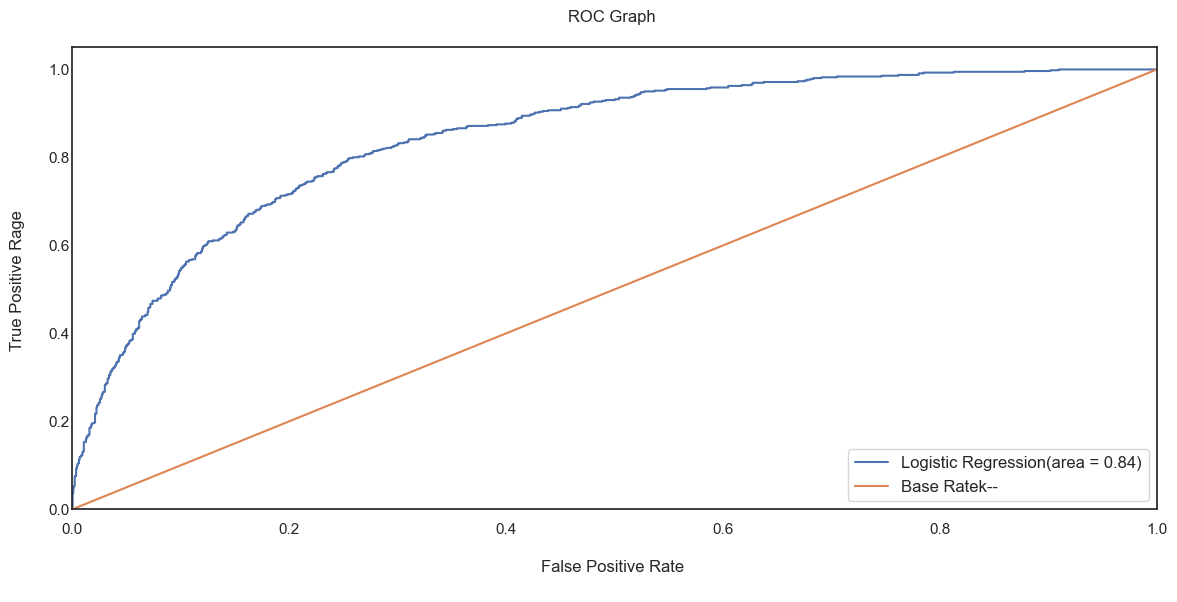

AttributeError: predict_proba is not available when  probability=False

In [127]:
preds=[y_pred,y_pred4,y_pred5,y_pred6,y_pred7,y_pred8,y_pred9,y_pred10]

classifiers=[classifier,classifier4,classifier5,classifier6,classifier7,classifier8,
            classifier9,classifier10]

model_names_ = ['Logistic Regression','SVM','Naive Bayes','Decision Tree','Random Forest',
               'Adaboost','Gradient Boost','Voting Classifier']

for i, j, k in zip(classifiers,model_names_,predictions):
    ROC_curve(i,j,k)

In [92]:
# cross validation

def cvDictGen(functions,scr,x=x_train,y_train=y,cv=5):
    cvDict={}

    for func in functions:
        cvScore=cross_val_score(func,x_train,y_train,cv=cv,scoring=scr)
        cvDict[str(func).split('(')[0]]=[cvScore.mean(),cvScore.std()]
    return cvDict

In [93]:
cvD=cvDistGen(classifiers,scr='roc_auc')
cvD

NameError: name 'cvDistGen' is not defined

In [95]:
# prediction feature importance

feature_importances=pd.concat([pd.DataFrame(df.columns,columns=['features']),
                              pd.DataFrame(np.transpose(classifier9.feature_importances_,columns=['coef'])]),axis=1)
feature_importances.sort_values(by='coef',ascending=False)

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (3649722415.py, line 4)